In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Train data preprocessing

In [68]:
train = pd.read_csv("train.csv")

In [69]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [70]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


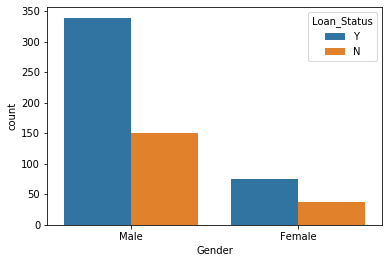

In [71]:
sns.countplot(x = 'Gender',data = train,hue = 'Loan_Status',orient = 'h')

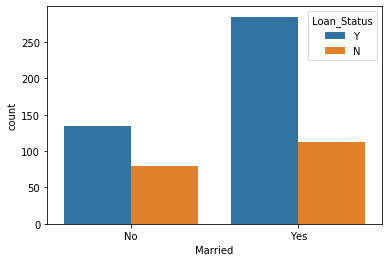

In [72]:
sns.countplot(x = 'Married',data = train,hue = 'Loan_Status')

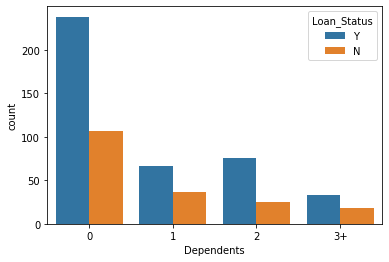

In [73]:
sns.countplot(x = 'Dependents',data = train,hue = 'Loan_Status')

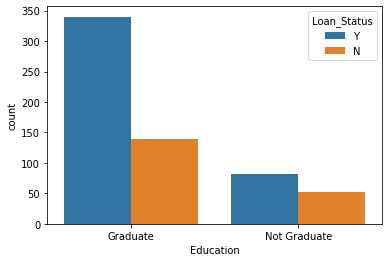

In [74]:
sns.countplot(x = 'Education',data = train,hue = 'Loan_Status')

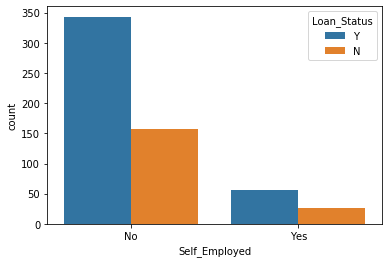

In [75]:
sns.countplot(x = 'Self_Employed',data = train,hue = 'Loan_Status')

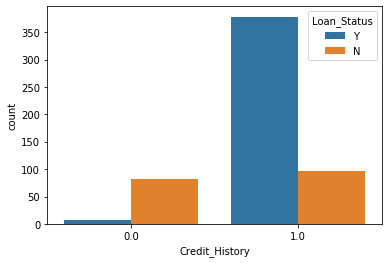

In [76]:
sns.countplot(x = 'Credit_History',data = train,hue = 'Loan_Status')

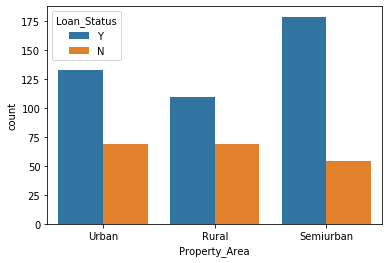

In [77]:
sns.countplot(x = 'Property_Area',data = train,hue = 'Loan_Status')

In [78]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [79]:
train['Loan_Status'] = train['Loan_Status'].apply(lambda x: 1 if (x == 'Y') else 0) 

In [80]:
train['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

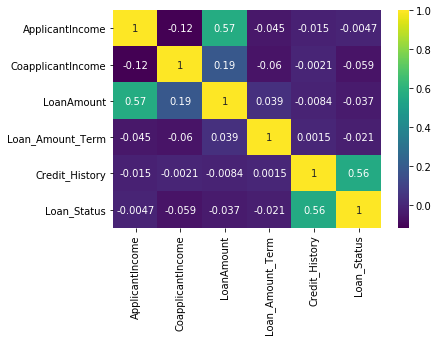

In [81]:
sns.heatmap(train.corr(),cmap = 'viridis',annot = True)

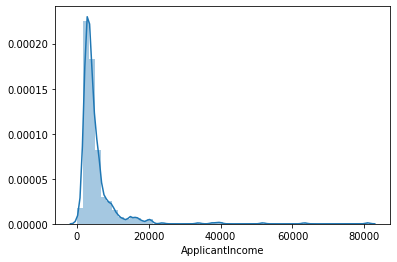

In [82]:
sns.distplot(train['ApplicantIncome'])

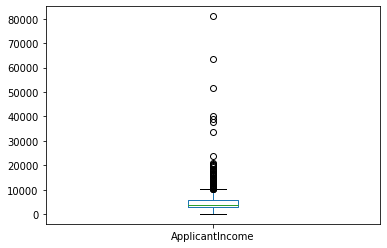

In [83]:
train['ApplicantIncome'].plot(kind = 'box')

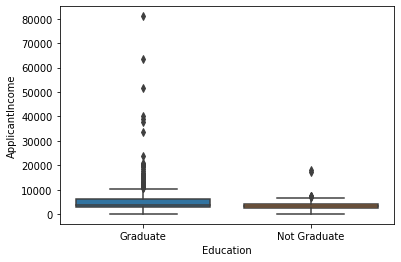

In [84]:
sns.boxplot(x = 'Education',y = 'ApplicantIncome',data =train)

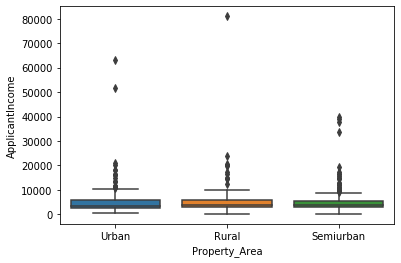

In [85]:
sns.boxplot(x = 'Property_Area',y = 'ApplicantIncome',data = train)

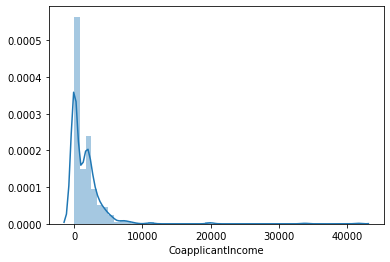

In [86]:
sns.distplot(train['CoapplicantIncome'])

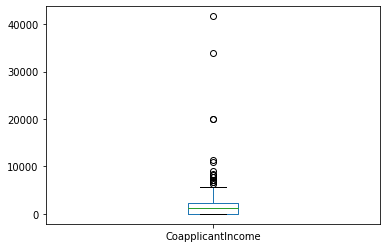

In [87]:
train['CoapplicantIncome'].plot(kind = 'box')

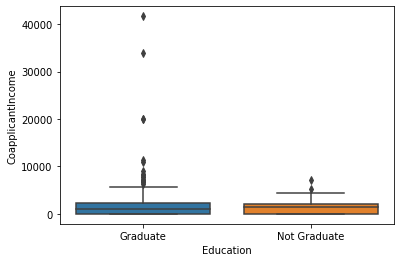

In [88]:
sns.boxplot(x = 'Education',y = 'CoapplicantIncome',data = train)

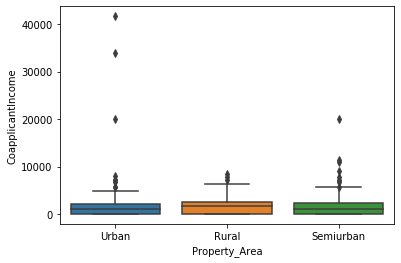

In [89]:
sns.boxplot(x = 'Property_Area',y = 'CoapplicantIncome',data = train)

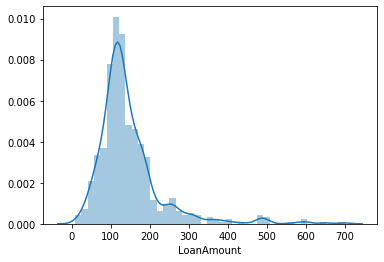

In [90]:
sns.distplot(train['LoanAmount'])

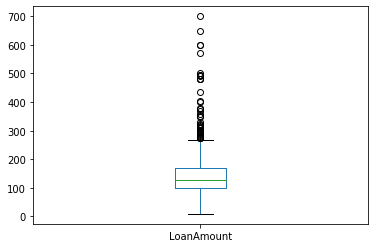

In [91]:
train['LoanAmount'].plot(kind = 'box')

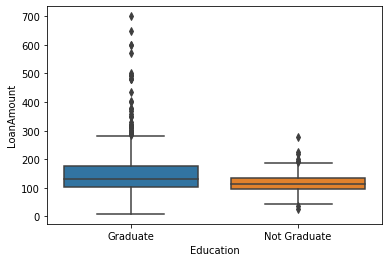

In [92]:
sns.boxplot(x = 'Education',y = 'LoanAmount',data = train)

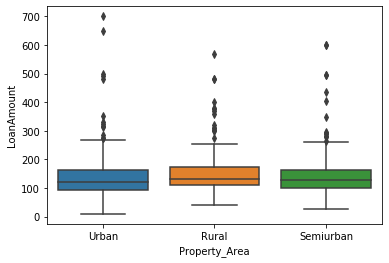

In [93]:
sns.boxplot(x = 'Property_Area', y = 'LoanAmount',data = train)

In [94]:
train['LoanAmount'].skew()

2.677551679256059

In [95]:
train['LoanAmount'] = np.log(train['LoanAmount'])

In [96]:
train['LoanAmount'].skew()

-0.19299810452881644

In [97]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [98]:
train['Gender'].fillna((train['Gender'].mode()[0]),inplace = True)


In [99]:
train['Married'].fillna((train['Married'].mode()[0]),inplace = True)

In [100]:
train['Dependents'] = train['Dependents'].apply(lambda x: 3 if(x == '3+') else x)

In [101]:
train['Dependents'].fillna((train['Dependents'].mode()[0]),inplace = True)

In [102]:
train['Dependents'] = train['Dependents'].apply(lambda x: int(x))

In [103]:
train['Self_Employed'].fillna((train['Self_Employed'].mode()[0]),inplace = True)

In [104]:
train['LoanAmount'].fillna((train['LoanAmount'].mean()),inplace = True)

In [105]:
train['Loan_Amount_Term'].fillna((train['Loan_Amount_Term'].mode()[0]),inplace = True)

In [106]:
train['Credit_History'].fillna((train['Credit_History'].mode()[0]),inplace = True)

In [107]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [108]:
dummies = pd.get_dummies(train[['Gender',
                                      'Married',
                                      'Education',
                                      'Self_Employed',
                                      'Property_Area']],drop_first = True)

In [109]:
train = pd.concat([train,dummies],axis = 1)

In [110]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,Male,No,0,Graduate,No,5849,0.0,4.857444,360.0,1.0,Urban,1,1,0,0,0,0,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,4.852030,360.0,1.0,Rural,0,1,1,0,0,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,4.189655,360.0,1.0,Urban,1,1,1,0,1,0,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,4.787492,360.0,1.0,Urban,1,1,1,1,0,0,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,4.948760,360.0,1.0,Urban,1,1,0,0,0,0,1


In [111]:
train = train.drop(['Gender',
                      'Married',
                      'Education',
                      'Self_Employed',
                      'Property_Area'],axis = 1)

In [112]:
train.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0,5849,0.0,4.857444,360.0,1.0,1,1,0,0,0,0,1
1,LP001003,1,4583,1508.0,4.852030,360.0,1.0,0,1,1,0,0,0,0
2,LP001005,0,3000,0.0,4.189655,360.0,1.0,1,1,1,0,1,0,1
3,LP001006,0,2583,2358.0,4.787492,360.0,1.0,1,1,1,1,0,0,1
4,LP001008,0,6000,0.0,4.948760,360.0,1.0,1,1,0,0,0,0,1


# Test data preprocessing

In [113]:
test = pd.read_csv('test.csv')

In [114]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [115]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [116]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [117]:
test['Gender'].fillna((test['Gender'].mode()[0]),inplace = True)

In [118]:
test['Dependents'] = test['Dependents'].apply(lambda x: 3 if(x == '3+') else x)

In [119]:
test['Dependents'].fillna((test['Dependents'].mode()[0]),inplace = True)

In [120]:
test['Dependents']= test['Dependents'].apply(lambda x: int(x))

In [121]:
test['Self_Employed'].fillna((test['Self_Employed'].mode()[0]),inplace = True)

In [122]:
test['Credit_History'].fillna((test['Credit_History'].mode()[0]),inplace = True)

In [123]:
dummies_test = pd.get_dummies(test[['Gender',
                                      'Married',
                                      'Education',
                                      'Self_Employed',
                                      'Property_Area']],drop_first = True)

In [124]:
test = pd.concat([test,dummies_test],axis = 1)

In [125]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,1,1,0,0,0,1
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,1,1,0,0,0,1
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,1,1,0,0,0,1
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,1,1,0,0,0,1
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,1,0,1,0,0,1


In [126]:
test = test.drop(['Gender',
                      'Married',
                      'Education',
                      'Self_Employed',
                      'Property_Area'],axis = 1)

In [127]:
test.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001015,0,5720,0,110.0,360.0,1.0,1,1,0,0,0,1
1,LP001022,1,3076,1500,126.0,360.0,1.0,1,1,0,0,0,1
2,LP001031,2,5000,1800,208.0,360.0,1.0,1,1,0,0,0,1
3,LP001035,2,2340,2546,100.0,360.0,1.0,1,1,0,0,0,1
4,LP001051,0,3276,0,78.0,360.0,1.0,1,0,1,0,0,1


# Train data - train test split

In [128]:
X = train.drop(['Loan_Status','Loan_ID'],axis = 1)

In [129]:
y = train['Loan_Status']

In [130]:
from sklearn.model_selection import train_test_split

In [159]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 101)

# Logistic Regression

In [160]:
from sklearn.linear_model import LogisticRegression

In [161]:
logmodel = LogisticRegression()

In [162]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [163]:
train_predict = logmodel.predict(X_test)

In [164]:
from sklearn.metrics import classification_report,confusion_matrix

In [165]:
print(classification_report(y_test,train_predict))

              precision    recall  f1-score   support

           0       0.93      0.41      0.57        64
           1       0.76      0.98      0.86       121

    accuracy                           0.78       185
   macro avg       0.84      0.69      0.71       185
weighted avg       0.82      0.78      0.76       185



In [166]:
print(confusion_matrix(y_test,train_predict))

[[ 26  38]
 [  2 119]]


In [167]:
from sklearn.model_selection import GridSearchCV

In [168]:
param_grid = { 'C': [0.1,1,10,100,1000], 'penalty': ['l1','l2','elasticnet','none']}

In [169]:
grid = GridSearchCV(LogisticRegression(),param_grid,verbose = 3)

In [170]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] C=0.1, penalty=l1 ...............................................
[CV] ..................... C=0.1, penalty=l1, score=nan, total=   0.0s
[CV] C=0.1, penalty=l1 ...............................................
[CV] ..................... C=0.1, penalty=l1, score=nan, total=   0.0s
[CV] C=0.1, penalty=l1 ...............................................
[CV] ..................... C=0.1, penalty=l1, score=nan, total=   0.0s
[CV] C=0.1, penalty=l1 ...............................................
[CV] ..................... C=0.1, penalty=l1, score=nan, total=   0.0s
[CV] C=0.1, penalty=l1 ...............................................
[CV] ..................... C=0.1, penalty=l1, score=nan, total=   0.0s
[CV] C=0.1, penalty=l2 ...............................................
[CV] ................... C=0.1, penalty=l2, score=0.767, total=   0.0s
[CV] C=0.1, penalty=l2 ...............................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\sivar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
C:\Users\sivar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

[CV] ................. C=0.1, penalty=none, score=0.779, total=   0.0s
[CV] C=0.1, penalty=none .............................................
[CV] ................. C=0.1, penalty=none, score=0.837, total=   0.0s
[CV] C=0.1, penalty=none .............................................
[CV] ................. C=0.1, penalty=none, score=0.826, total=   0.0s
[CV] C=0.1, penalty=none .............................................
[CV] ................. C=0.1, penalty=none, score=0.872, total=   0.0s
[CV] C=0.1, penalty=none .............................................
[CV] ................. C=0.1, penalty=none, score=0.765, total=   0.0s
[CV] C=1, penalty=l1 .................................................
[CV] ....................... C=1, penalty=l1, score=nan, total=   0.0s
[CV] C=1, penalty=l1 .................................................
[CV] ....................... C=1, penalty=l1, score=nan, total=   0.0s
[CV] C=1, penalty=l1 .................................................
[CV] .

C:\Users\sivar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\sivar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\sivar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STO

[CV] ..................... C=1, penalty=l2, score=0.791, total=   0.0s
[CV] C=1, penalty=l2 .................................................
[CV] ..................... C=1, penalty=l2, score=0.837, total=   0.0s
[CV] C=1, penalty=l2 .................................................
[CV] ..................... C=1, penalty=l2, score=0.837, total=   0.0s
[CV] C=1, penalty=l2 .................................................
[CV] ..................... C=1, penalty=l2, score=0.872, total=   0.0s
[CV] C=1, penalty=l2 .................................................
[CV] ..................... C=1, penalty=l2, score=0.765, total=   0.0s
[CV] C=1, penalty=elasticnet .........................................
[CV] ............... C=1, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, penalty=elasticnet .........................................
[CV] ............... C=1, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, penalty=elasticnet .........................................
[CV] .

C:\Users\sivar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\sivar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg


[CV] C=1, penalty=none ...............................................
[CV] ................... C=1, penalty=none, score=0.826, total=   0.1s
[CV] C=1, penalty=none ...............................................
[CV] ................... C=1, penalty=none, score=0.872, total=   0.0s
[CV] C=1, penalty=none ...............................................
[CV] ................... C=1, penalty=none, score=0.765, total=   0.0s
[CV] C=10, penalty=l1 ................................................
[CV] ...................... C=10, penalty=l1, score=nan, total=   0.0s
[CV] C=10, penalty=l1 ................................................
[CV] ...................... C=10, penalty=l1, score=nan, total=   0.0s
[CV] C=10, penalty=l1 ................................................
[CV] ...................... C=10, penalty=l1, score=nan, total=   0.0s
[CV] C=10, penalty=l1 ................................................
[CV] ...................... C=10, penalty=l1, score=nan, total=   0.0s
[CV] 

C:\Users\sivar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\sivar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

[CV] .................... C=10, penalty=l2, score=0.837, total=   0.0s
[CV] C=10, penalty=l2 ................................................
[CV] .................... C=10, penalty=l2, score=0.872, total=   0.0s
[CV] C=10, penalty=l2 ................................................
[CV] .................... C=10, penalty=l2, score=0.765, total=   0.0s
[CV] C=10, penalty=elasticnet ........................................
[CV] .............. C=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, penalty=elasticnet ........................................
[CV] .............. C=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, penalty=elasticnet ........................................
[CV] .............. C=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, penalty=elasticnet ........................................
[CV] .............. C=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, penalty=elasticnet ........................................
[CV] .

C:\Users\sivar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\sivar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\sivar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\sivar\anaconda3\lib\

[CV] .................. C=10, penalty=none, score=0.826, total=   0.1s
[CV] C=10, penalty=none ..............................................
[CV] .................. C=10, penalty=none, score=0.872, total=   0.1s
[CV] C=10, penalty=none ..............................................
[CV] .................. C=10, penalty=none, score=0.765, total=   0.0s
[CV] C=100, penalty=l1 ...............................................
[CV] ..................... C=100, penalty=l1, score=nan, total=   0.0s
[CV] C=100, penalty=l1 ...............................................
[CV] ..................... C=100, penalty=l1, score=nan, total=   0.0s
[CV] C=100, penalty=l1 ...............................................
[CV] ..................... C=100, penalty=l1, score=nan, total=   0.0s
[CV] C=100, penalty=l1 ...............................................
[CV] ..................... C=100, penalty=l1, score=nan, total=   0.0s
[CV] C=100, penalty=l1 ...............................................
[CV] .

C:\Users\sivar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\sivar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\sivar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\sivar\anaconda3\lib\


[CV] C=100, penalty=none .............................................
[CV] ................. C=100, penalty=none, score=0.765, total=   0.0s
[CV] C=1000, penalty=l1 ..............................................
[CV] .................... C=1000, penalty=l1, score=nan, total=   0.0s
[CV] C=1000, penalty=l1 ..............................................
[CV] .................... C=1000, penalty=l1, score=nan, total=   0.0s
[CV] C=1000, penalty=l1 ..............................................
[CV] .................... C=1000, penalty=l1, score=nan, total=   0.0s
[CV] C=1000, penalty=l1 ..............................................
[CV] .................... C=1000, penalty=l1, score=nan, total=   0.0s
[CV] C=1000, penalty=l1 ..............................................
[CV] .................... C=1000, penalty=l1, score=nan, total=   0.0s
[CV] C=1000, penalty=l2 ..............................................
[CV] .................. C=1000, penalty=l2, score=0.779, total=   0.0s
[CV] 

C:\Users\sivar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\sivar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\sivar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs support


[CV] C=1000, penalty=elasticnet ......................................
[CV] ............ C=1000, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1000, penalty=elasticnet ......................................
[CV] ............ C=1000, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1000, penalty=elasticnet ......................................
[CV] ............ C=1000, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1000, penalty=elasticnet ......................................
[CV] ............ C=1000, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1000, penalty=elasticnet ......................................
[CV] ............ C=1000, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1000, penalty=none ............................................
[CV] ................ C=1000, penalty=none, score=0.779, total=   0.0s
[CV] C=1000, penalty=none ............................................
[CV] ................ C=1000, penalty=none, score=0.837, total=   0.0s
[CV] 

C:\Users\sivar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\sivar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\sivar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [171]:
grid.best_params_

{'C': 1, 'penalty': 'l2'}

In [172]:
grid.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [173]:
grid_pred = grid.predict(X_test)

In [174]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.93      0.41      0.57        64
           1       0.76      0.98      0.86       121

    accuracy                           0.78       185
   macro avg       0.84      0.69      0.71       185
weighted avg       0.82      0.78      0.76       185



In [175]:
print(confusion_matrix(y_test,grid_pred))

[[ 26  38]
 [  2 119]]


# Random Forest

In [176]:
from sklearn.ensemble import RandomForestClassifier

In [189]:
random = RandomForestClassifier(n_estimators = 1000)

In [190]:
random.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [191]:
r_predict = random.predict(X_test)

In [192]:
from sklearn.metrics import classification_report,confusion_matrix

In [193]:
print(classification_report(y_test,r_predict))

              precision    recall  f1-score   support

           0       0.84      0.42      0.56        64
           1       0.76      0.96      0.85       121

    accuracy                           0.77       185
   macro avg       0.80      0.69      0.70       185
weighted avg       0.79      0.77      0.75       185



In [194]:
print(confusion_matrix(y_test,r_predict))

[[ 27  37]
 [  5 116]]


# Support vector machine

In [195]:
from sklearn.svm import SVC

In [197]:
svc = SVC()

In [203]:
svc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [204]:
svc_predict = svc.predict(X_test)

In [205]:
from sklearn.metrics import classification_report,confusion_matrix

In [206]:
print(classification_report(y_test,svc_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        64
           1       0.65      1.00      0.79       121

    accuracy                           0.65       185
   macro avg       0.33      0.50      0.40       185
weighted avg       0.43      0.65      0.52       185



C:\Users\sivar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [207]:
from sklearn.model_selection import GridSearchCV

In [208]:
param_grid = {'C':[0.1,1,10,100,1000], 'gamma': [1,0.1,0.01,0.001,0.0001]}

In [209]:
grid_svm = GridSearchCV(SVC(),param_grid,verbose = 3)

In [210]:
grid_svm.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.698, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.698, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.698, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.709, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.706, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.698, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................... C=0.1, gamma=0.1, score=0.706, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.698, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.698, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.698, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.709, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.706, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.698, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    2.6s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [211]:
grid_svm.best_params_

{'C': 10, 'gamma': 1}

In [212]:
grid_svm.best_estimator_

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [213]:
grid_svm_pred = grid_svm.predict(X_test)

In [214]:
from sklearn.metrics import classification_report,confusion_matrix

In [216]:
print(classification_report(y_test,grid_svm_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        64
           1       0.65      1.00      0.79       121

    accuracy                           0.65       185
   macro avg       0.33      0.50      0.40       185
weighted avg       0.43      0.65      0.52       185



C:\Users\sivar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
